#📌 Extracción

##Conexion a URL o a repositorio

In [774]:
archivo='https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

##Importando libreria

In [775]:
import pandas as pd
import numpy as np

In [776]:
datos_in=pd.read_json(archivo)
datos_in.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🛠️ Preparación de los Datos

##Explorando datos

In [777]:
datos_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


##Convirtiendo columnas JSON a DF

In [778]:
datos_list = list()
#desde la columna 2 en adelante normalizo los datos para cada columna creando una lista
for col in datos_in.columns[2:]:
    v = pd.json_normalize(datos_in[col])  #Crea un DF para cada columna a normalizar dejando cada vaor unico dentro de la columna como una nueva columna
    v.columns = [f'{col}_{c}' for c in v.columns]    #Asigna el nombre a las nuevas columnas normailizadas (Nombre de la columna original+ nombre de columnas de nuevo DF)
    datos_list.append(v)

# combino todo en un dataframe
datos_normalized = pd.concat([datos_in.iloc[:, :2]] + datos_list, axis=1)  #dato todas las filas y columna 0 y 1 + datos_klist que son los normaliados, axis=1 se agrega al lado
datos_normalized.tail(3)


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.6


##Limpieza de datos

In [779]:
datos_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [780]:
datos_normalized.isna().sum()

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [781]:
columnas=list(datos_normalized.columns)
datos_normalized[datos_normalized[columnas]==' '].count().sort_values(ascending=False)


,0
account_Charges.Total,11
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customerID,0
customer_Partner,0
customer_Dependents,0
phone_PhoneService,0
customer_tenure,0
internet_InternetService,0


In [782]:
borrar=list(datos_normalized[datos_normalized['account_Charges.Total'].str.contains(" ", regex=False)].index)
datos_normalized.drop(index=borrar,inplace=True)
datos_normalized.reset_index(drop=True, inplace=True)
datos_normalized.tail(3)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
7253,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7254,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7255,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.6


##Transformando datos

In [783]:
columnas=list(datos_normalized.columns)
#Recorre las columnas para identicar los valores únicos
for c in columnas:
  print(f'{len(pd.unique(datos_normalized[c]))} Datos unicos para {c}:  {pd.unique(datos_normalized[c])}')

7256 Datos unicos para customerID:  ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
3 Datos unicos para Churn:  ['No' 'Yes' '']
2 Datos unicos para customer_gender:  ['Female' 'Male']
2 Datos unicos para customer_SeniorCitizen:  [0 1]
2 Datos unicos para customer_Partner:  ['Yes' 'No']
2 Datos unicos para customer_Dependents:  ['Yes' 'No']
72 Datos unicos para customer_tenure:  [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42]
2 Datos unicos para phone_PhoneService:  ['Yes' 'No']
3 Datos unicos para phone_MultipleLines:  ['No' 'Yes' 'No phone service']
3 Datos unicos para internet_InternetService:  ['DSL' 'Fiber optic' 'No']
3 Datos unicos para internet_OnlineSecurity:  ['No' 'Yes' 'No internet service']
3 Datos unicos para internet_OnlineBackup:  ['Yes' 'No' 'No internet service']


In [784]:
#Chequea valores vacios de la columna renuncia.  Como existe un pago de cuenta mensual vigente, se considera con Churn = NO
dfx=datos_normalized[datos_normalized['Churn']=='']
dfx=dfx[dfx['account_Charges.Monthly']==' ']
dfx

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total


In [785]:
dfx['account_Charges.Monthly'].isna().sum()

np.int64(0)

In [786]:
dfx['account_Charges.Monthly'].isnull().sum()

np.int64(0)

In [787]:
#estandarizando datos. Se reemplazan valores y se djan todos en 0 y 1
datos_normalized['Churn']=datos_normalized['Churn'].replace('','No')
datos_normalized['customer_gender']=datos_normalized['customer_gender'].replace('Female','No').replace('Male','Yes')
datos_normalized['phone_MultipleLines']=datos_normalized['phone_MultipleLines'].replace('No phone service','No')
datos_normalized['internet_InternetService']=datos_normalized['internet_InternetService'].replace('DSL','Yes').replace('Fiber optic','Yes')
datos_normalized=datos_normalized.replace('No internet service','No')
datos_normalized['account_PaymentMethod']=datos_normalized['account_PaymentMethod'].str.replace(' (automatic)','')
datos_normalized=datos_normalized.replace('No','0').replace('Yes','1')
datos_normalized.head()


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,0,0,0,1,1,9,1,0,1,...,1,0,1,1,0,One year,1,Mailed check,65.6,593.3
1,0003-MKNFE,0,1,0,0,0,9,1,1,1,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4
2,0004-TLHLJ,1,1,0,0,0,4,1,0,1,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,1,1,1,0,13,1,0,1,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,0,1,1,0,3,1,0,1,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.4


In [788]:
#Se convierten columnas categóricas para que queden con valores 0 y 1
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
categoricas = ['account_Contract','account_PaymentMethod']

one_hot_enc = make_column_transformer((OneHotEncoder(handle_unknown='ignore'),categoricas),remainder='passthrough',sparse_threshold=0,force_int_remainder_cols=False)
#one_hot_enc = make_column_transformer((OneHotEncoder(drop='first',handle_unknown='ignore'),categoricas),remainder='passthrough',sparse_threshold=0,force_int_remainder_cols=False)

datos_normalized = one_hot_enc.fit_transform(datos_normalized)
datos_normalized = pd.DataFrame(datos_normalized, columns=one_hot_enc.get_feature_names_out())
datos_normalized

,onehotencoder__account_Contract_Month-to-month,onehotencoder__account_Contract_One year,onehotencoder__account_Contract_Two year,onehotencoder__account_PaymentMethod_Bank transfer,onehotencoder__account_PaymentMethod_Credit card,onehotencoder__account_PaymentMethod_Electronic check,onehotencoder__account_PaymentMethod_Mailed check,remainder__customerID,remainder__Churn,remainder__customer_gender,...,remainder__internet_InternetService,remainder__internet_OnlineSecurity,remainder__internet_OnlineBackup,remainder__internet_DeviceProtection,remainder__internet_TechSupport,remainder__internet_StreamingTV,remainder__internet_StreamingMovies,remainder__account_PaperlessBilling,remainder__account_Charges.Monthly,remainder__account_Charges.Total
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0002-ORFBO,0,0,...,1,0,1,0,1,1,0,1,65.6,593.3
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0003-MKNFE,0,1,...,1,0,0,0,0,0,1,0,59.9,542.4
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0004-TLHLJ,1,1,...,1,0,0,1,0,0,0,1,73.9,280.85
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0011-IGKFF,1,1,...,1,0,1,1,0,1,1,1,98.0,1237.85
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0013-EXCHZ,1,0,...,1,0,0,0,1,1,0,1,83.9,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,0.0,1.0,0.0,0.0,0.0,0.0,1.0,9987-LUTYD,0,0,...,1,1,0,0,1,0,0,0,55.15,742.9
7252,1.0,0.0,0.0,0.0,0.0,1.0,0.0,9992-RRAMN,1,1,...,1,0,0,0,0,0,1,1,85.1,1873.7
7253,1.0,0.0,0.0,0.0,0.0,0.0,1.0,9992-UJOEL,0,1,...,1,0,1,0,0,0,0,1,50.3,92.75
7254,0.0,0.0,1.0,0.0,0.0,0.0,1.0,9993-LHIEB,0,1,...,1,1,0,1,1,0,1,0,67.85,4627.65


In [789]:
columnas=list(datos_normalized.columns)
#Recorre las columnas para identicar los valores únicos
for c in columnas:
  print(f'{len(pd.unique(datos_normalized[c]))} Datos unicos para {c}:  {pd.unique(datos_normalized[c])}')

2 Datos unicos para onehotencoder__account_Contract_Month-to-month:  [0.0 1.0]
2 Datos unicos para onehotencoder__account_Contract_One year:  [1.0 0.0]
2 Datos unicos para onehotencoder__account_Contract_Two year:  [0.0 1.0]
2 Datos unicos para onehotencoder__account_PaymentMethod_Bank transfer:  [0.0 1.0]
2 Datos unicos para onehotencoder__account_PaymentMethod_Credit card:  [0.0 1.0]
2 Datos unicos para onehotencoder__account_PaymentMethod_Electronic check:  [0.0 1.0]
2 Datos unicos para onehotencoder__account_PaymentMethod_Mailed check:  [1.0 0.0]
7256 Datos unicos para remainder__customerID:  ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
2 Datos unicos para remainder__Churn:  ['0' '1']
2 Datos unicos para remainder__customer_gender:  ['0' '1']
2 Datos unicos para remainder__customer_SeniorCitizen:  [0 1]
2 Datos unicos para remainder__customer_Partner:  ['1' '0']
2 Datos unicos para remainder__customer_Dependents:  ['1' '0']
72 Datos unicos pa

In [790]:
datos_normalized.columns

Index(['onehotencoder__account_Contract_Month-to-month',
       'onehotencoder__account_Contract_One year',
       'onehotencoder__account_Contract_Two year',
       'onehotencoder__account_PaymentMethod_Bank transfer',
       'onehotencoder__account_PaymentMethod_Credit card',
       'onehotencoder__account_PaymentMethod_Electronic check',
       'onehotencoder__account_PaymentMethod_Mailed check',
       'remainder__customerID', 'remainder__Churn',
       'remainder__customer_gender', 'remainder__customer_SeniorCitizen',
       'remainder__customer_Partner', 'remainder__customer_Dependents',
       'remainder__customer_tenure', 'remainder__phone_PhoneService',
       'remainder__phone_MultipleLines', 'remainder__internet_InternetService',
       'remainder__internet_OnlineSecurity',
       'remainder__internet_OnlineBackup',
       'remainder__internet_DeviceProtection',
       'remainder__internet_TechSupport', 'remainder__internet_StreamingTV',
       'remainder__internet_Streaming

In [791]:
#Cambio de nombres a columnas
datos_normalized = datos_normalized.rename(columns={'onehotencoder__account_Contract_Month-to-month': 'Contrato_mensual',
'onehotencoder__account_Contract_One year': 'Contrato_1_año',
'onehotencoder__account_Contract_Two year': 'Contrato_2_años',
'onehotencoder__account_PaymentMethod_Bank transfer': 'Pago_transferencia',
'onehotencoder__account_PaymentMethod_Credit card': 'Pago_tarjeta',
'onehotencoder__account_PaymentMethod_Electronic check': 'Pago_chequera_electronica',
'onehotencoder__account_PaymentMethod_Mailed check': 'Pago_cheque',
'remainder__customerID': 'ID',
'remainder__Churn': 'Renuncia',
'remainder__customer_gender': 'Genero_Masculino',
'remainder__customer_SeniorCitizen':'Adulto_Mayor',
'remainder__customer_Partner': 'Casado',
'remainder__customer_Dependents':'Cargas',
'remainder__customer_tenure': 'Meses_contrato',
'remainder__phone_PhoneService':'Servicio_telefonico',
'remainder__phone_MultipleLines': 'Multilineas',
'remainder__internet_InternetService':'Servicio_internet',
'remainder__internet_OnlineSecurity':'Seguridad_online',
'remainder__internet_OnlineBackup':'Respaldo_online',
'remainder__internet_DeviceProtection':'Proteccion_equipo',
'remainder__internet_TechSupport': 'Soporte_tecnico',
'remainder__internet_StreamingTV':'TVcable',
'remainder__internet_StreamingMovies':'Peliculas_online',
'remainder__account_PaperlessBilling':'Factura_online',
'remainder__account_Charges.Monthly':'Factura_mensual',
'remainder__account_Charges.Total':'Total'})

datos_normalized.columns

Index(['Contrato_mensual', 'Contrato_1_año', 'Contrato_2_años',
       'Pago_transferencia', 'Pago_tarjeta', 'Pago_chequera_electronica',
       'Pago_cheque', 'ID', 'Renuncia', 'Genero_Masculino', 'Adulto_Mayor',
       'Casado', 'Cargas', 'Meses_contrato', 'Servicio_telefonico',
       'Multilineas', 'Servicio_internet', 'Seguridad_online',
       'Respaldo_online', 'Proteccion_equipo', 'Soporte_tecnico', 'TVcable',
       'Peliculas_online', 'Factura_online', 'Factura_mensual', 'Total'],
      dtype='object')

###Convertir tipo de dato   (Object a Float)

In [792]:

datos_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Contrato_mensual           7256 non-null   object
 1   Contrato_1_año             7256 non-null   object
 2   Contrato_2_años            7256 non-null   object
 3   Pago_transferencia         7256 non-null   object
 4   Pago_tarjeta               7256 non-null   object
 5   Pago_chequera_electronica  7256 non-null   object
 6   Pago_cheque                7256 non-null   object
 7   ID                         7256 non-null   object
 8   Renuncia                   7256 non-null   object
 9   Genero_Masculino           7256 non-null   object
 10  Adulto_Mayor               7256 non-null   object
 11  Casado                     7256 non-null   object
 12  Cargas                     7256 non-null   object
 13  Meses_contrato             7256 non-null   object
 14  Servicio

###Cambiando tipo de datos


In [793]:
columna_excluir = 'ID'
columnas_a_convertir = [col for col in datos_normalized.columns if col != columna_excluir]

# 3. Convertir las columnas seleccionadas a float
# Usando .astype() para un grupo de columnas
datos_normalized[columnas_a_convertir] = datos_normalized[columnas_a_convertir].astype(float)

In [794]:
datos_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Contrato_mensual           7256 non-null   float64
 1   Contrato_1_año             7256 non-null   float64
 2   Contrato_2_años            7256 non-null   float64
 3   Pago_transferencia         7256 non-null   float64
 4   Pago_tarjeta               7256 non-null   float64
 5   Pago_chequera_electronica  7256 non-null   float64
 6   Pago_cheque                7256 non-null   float64
 7   ID                         7256 non-null   object 
 8   Renuncia                   7256 non-null   float64
 9   Genero_Masculino           7256 non-null   float64
 10  Adulto_Mayor               7256 non-null   float64
 11  Casado                     7256 non-null   float64
 12  Cargas                     7256 non-null   float64
 13  Meses_contrato             7256 non-null   float

###Guardando columna ID

In [795]:
df_ID=datos_normalized['ID']
df_ID

,ID
0,0002-ORFBO
1,0003-MKNFE
2,0004-TLHLJ
3,0011-IGKFF
4,0013-EXCHZ
...,...
7251,9987-LUTYD
7252,9992-RRAMN
7253,9992-UJOEL
7254,9993-LHIEB


### Eliminación de Columnas Irrelevantes

Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente).

In [796]:
datos_normalized=datos_normalized.drop('ID',axis=1)
datos_normalized.head()

,Contrato_mensual,Contrato_1_año,Contrato_2_años,Pago_transferencia,Pago_tarjeta,Pago_chequera_electronica,Pago_cheque,Renuncia,Genero_Masculino,Adulto_Mayor,...,Servicio_internet,Seguridad_online,Respaldo_online,Proteccion_equipo,Soporte_tecnico,TVcable,Peliculas_online,Factura_online,Factura_mensual,Total
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,65.6,593.30
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.9,542.40
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,73.9,280.85
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,98.0,1237.85
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,83.9,267.40


#Análisis de Validación de Modelo de datos



### Datos Limpios

In [797]:
datos=datos_normalized.copy()
datos.head()

,Contrato_mensual,Contrato_1_año,Contrato_2_años,Pago_transferencia,Pago_tarjeta,Pago_chequera_electronica,Pago_cheque,Renuncia,Genero_Masculino,Adulto_Mayor,...,Servicio_internet,Seguridad_online,Respaldo_online,Proteccion_equipo,Soporte_tecnico,TVcable,Peliculas_online,Factura_online,Factura_mensual,Total
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,65.6,593.30
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.9,542.40
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,73.9,280.85
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,98.0,1237.85
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,83.9,267.40


### Importando Bibilotecas

Se presentan los recursos necesarios que serán utilizados en este poyecto, importando cada una de las bibliotecas

In [798]:
import  pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold,cross_validate, GridSearchCV
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,RocCurveDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.pipeline import Pipeline as imbpipeline




## Separación de datos

Separamos nuestros datos para poder tener distintos conjuntos con los cuales se realizará un entrenemiento de modelos para al final elegir el mejor y con este último chequear como actua mi modelo con datos nunca antes vistos.

In [799]:

X=datos.drop('Renuncia',axis=1)
y=datos['Renuncia']

X_ent,X_test,y_ent,y_test=train_test_split(X,y,test_size=0.2,random_state=5,stratify=y)
X_train,X_val,y_train,y_val=train_test_split(X_ent,y_ent,test_size=0.1,random_state=5,stratify=y_ent)

print(f'Los datos totales son                   {datos.shape[0]}')
print(f'Los datos de X_ent son                      {X_ent.shape[0]}  = (train + val)')
print(f'Los datos de prueba son                 {X_test.shape[0]}')
print(f'Los datos de entrenamiento son   {X_train.shape[0]}')
print(f'Los datos de validación son      {X_val.shape[0]}')


Los datos totales son                   7256
Los datos de X_ent son                      5804  = (train + val)
Los datos de prueba son                 1452
Los datos de entrenamiento son   5223
Los datos de validación son      581


## Verificación de la Proporción de Cancelación (Renuncia)


*   0 --- Se mantienen en la empresa
*  1  --- Renunciaron a la empresa


In [800]:
datos.Renuncia.value_counts()


,count
Renuncia,
0.0,5387
1.0,1869


In [801]:
datos.Renuncia.value_counts(normalize=True)

,proportion
Renuncia,
0.0,0.74242
1.0,0.25758


## Análisis de Correlación

Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

In [802]:
datos_corr=datos.corr().round(2)
datos_corr

,Contrato_mensual,Contrato_1_año,Contrato_2_años,Pago_transferencia,Pago_tarjeta,Pago_chequera_electronica,Pago_cheque,Renuncia,Genero_Masculino,Adulto_Mayor,...,Servicio_internet,Seguridad_online,Respaldo_online,Proteccion_equipo,Soporte_tecnico,TVcable,Peliculas_online,Factura_online,Factura_mensual,Total
Contrato_mensual,1.00,-0.57,-0.62,-0.18,-0.21,0.33,0.01,0.40,-0.00,0.14,...,0.22,-0.25,-0.16,-0.23,-0.28,-0.11,-0.12,0.17,0.06,-0.45
Contrato_1_año,-0.57,1.00,-0.29,0.06,0.07,-0.11,-0.00,-0.17,0.01,-0.05,...,-0.03,0.10,0.09,0.10,0.10,0.06,0.07,-0.05,0.01,0.18
Contrato_2_años,-0.62,-0.29,1.00,0.16,0.17,-0.28,-0.01,-0.29,-0.01,-0.11,...,-0.22,0.19,0.11,0.16,0.24,0.07,0.07,-0.15,-0.08,0.35
Pago_transferencia,-0.18,0.06,0.16,1.00,-0.28,-0.38,-0.29,-0.11,-0.02,-0.02,...,-0.00,0.09,0.08,0.08,0.10,0.05,0.05,-0.02,0.04,0.18
Pago_tarjeta,-0.21,0.07,0.17,-0.28,1.00,-0.37,-0.29,-0.13,0.00,-0.02,...,0.00,0.12,0.09,0.11,0.12,0.04,0.05,-0.01,0.03,0.18
Pago_chequera_electronica,0.33,-0.11,-0.28,-0.38,-0.37,1.00,-0.39,0.29,0.00,0.17,...,0.29,-0.11,0.00,-0.00,-0.11,0.15,0.14,0.21,0.28,-0.06
Pago_cheque,0.01,-0.00,-0.01,-0.29,-0.29,-0.39,1.00,-0.09,0.01,-0.15,...,-0.32,-0.08,-0.17,-0.19,-0.09,-0.25,-0.25,-0.21,-0.38,-0.30
Renuncia,0.40,-0.17,-0.29,-0.11,-0.13,0.29,-0.09,1.00,-0.01,0.15,...,0.22,-0.17,-0.08,-0.06,-0.16,0.06,0.06,0.19,0.19,-0.19
Genero_Masculino,-0.00,0.01,-0.01,-0.02,0.00,0.00,0.01,-0.01,1.00,-0.00,...,-0.01,-0.02,-0.01,-0.00,-0.01,-0.01,-0.01,-0.01,-0.01,0.00
Adulto_Mayor,0.14,-0.05,-0.11,-0.02,-0.02,0.17,-0.15,0.15,-0.00,1.00,...,0.18,-0.04,0.07,0.06,-0.06,0.10,0.12,0.16,0.22,0.10


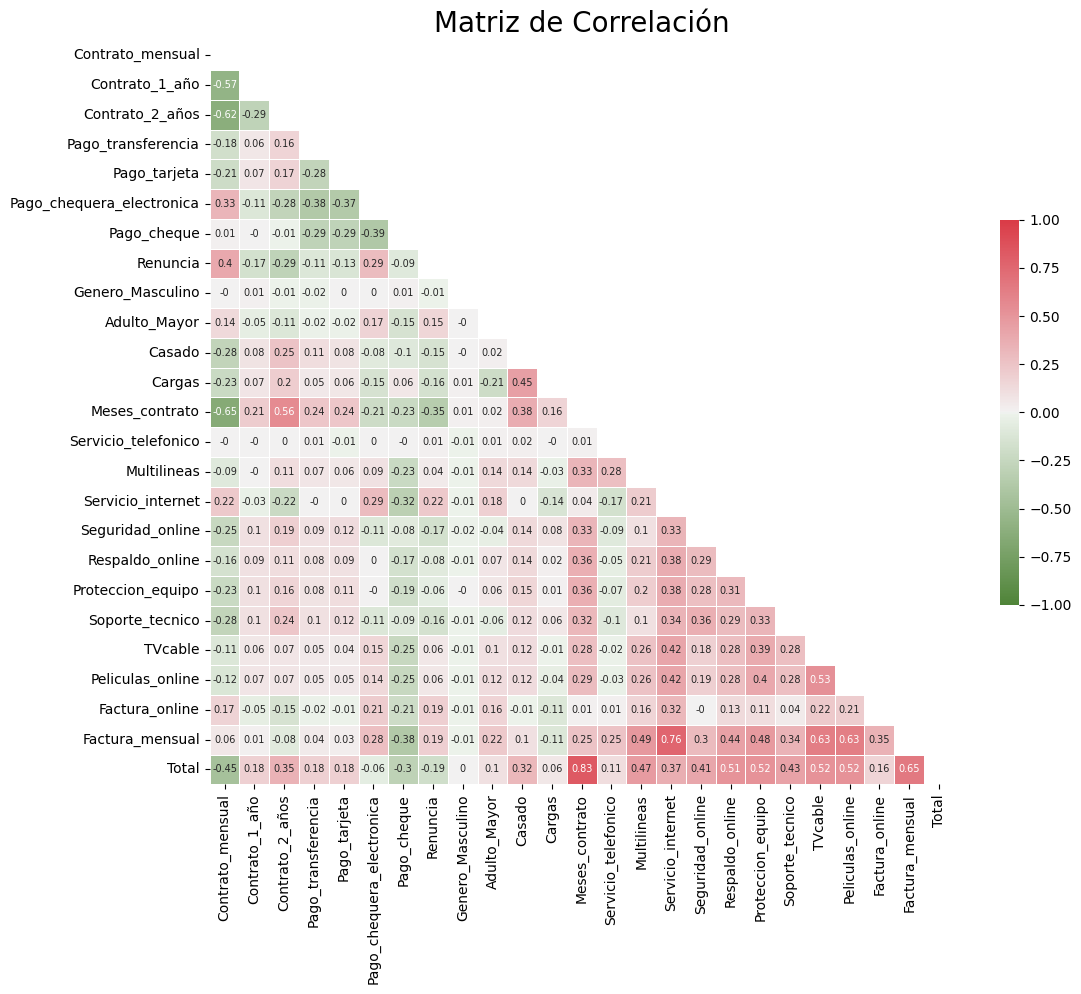

In [803]:
# ¿Qué factores están más correlacionados?

# Generar una máscara para el triángulo superior
mascara = np.zeros_like(datos_corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(12,10))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(120, 10, as_cmap=True)

sns.heatmap(datos_corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, annot_kws={'size': 7},cbar_kws={"shrink": .5})

# Ajustar tamaño de las etiquetas de los ejes
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Matriz de Correlación', fontsize=20)

# Mostrar el mapa de calor (heatmap)
plt.show()

In [804]:
#Correlación con la Evasión
datos_corr_evasion=datos.corr()['Renuncia'].sort_values(ascending=False)
datos_corr_evasion

,Renuncia
Renuncia,1.000000
Contrato_mensual,0.395067
Pago_chequera_electronica,0.294181
Servicio_internet,0.223755
Factura_mensual,0.189393
Factura_online,0.186309
Adulto_Mayor,0.146400
TVcable,0.062456
Peliculas_online,0.060092
Multilineas,0.039277


In [805]:
#Correlación con la Evasión en valores absolutos
datos_corr_evasion=datos_corr_evasion.abs().sort_values(ascending=False)
datos_corr_evasion

,Renuncia
Renuncia,1.000000
Contrato_mensual,0.395067
Meses_contrato,0.345799
Contrato_2_años,0.294467
Pago_chequera_electronica,0.294181
Servicio_internet,0.223755
Total,0.194440
Factura_mensual,0.189393
Factura_online,0.186309
Contrato_1_año,0.174340


In [806]:
#Elije las columnas con correlación mayor al 15% considerando los valores absolutos
filtro=datos_corr_evasion[datos_corr_evasion.abs()>0.15]
#Elije las columnas con correlación menor al 15% para eliminarlas de DF
elimina=datos_corr_evasion[datos_corr_evasion.abs()<0.15]
datos_corr_evasion=filtro
datos_corr_evasion

,Renuncia
Renuncia,1.000000
Contrato_mensual,0.395067
Meses_contrato,0.345799
Contrato_2_años,0.294467
Pago_chequera_electronica,0.294181
Servicio_internet,0.223755
Total,0.194440
Factura_mensual,0.189393
Factura_online,0.186309
Contrato_1_año,0.174340


In [807]:
#Columnas que pueden ser eliminadas por tener una baja correlación con la varible dependiente 8Evasión)
elimina

,Renuncia
Casado,0.148106
Adulto_Mayor,0.146400
Pago_tarjeta,0.131448
Pago_transferencia,0.114953
Pago_cheque,0.089198
Respaldo_online,0.080211
Proteccion_equipo,0.063479
TVcable,0.062456
Peliculas_online,0.060092
Multilineas,0.039277


In [808]:
datos_corr_filtrado=datos.drop(elimina.index,axis=1)
datos_corr=datos_corr_filtrado
datos_corr


,Contrato_mensual,Contrato_1_año,Contrato_2_años,Pago_chequera_electronica,Renuncia,Cargas,Meses_contrato,Servicio_internet,Seguridad_online,Soporte_tecnico,Factura_online,Factura_mensual,Total
0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,1.0,0.0,1.0,1.0,65.60,593.30
1,1.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,0.0,0.0,0.0,59.90,542.40
2,1.0,0.0,0.0,1.0,1.0,0.0,4.0,1.0,0.0,0.0,1.0,73.90,280.85
3,1.0,0.0,0.0,1.0,1.0,0.0,13.0,1.0,0.0,0.0,1.0,98.00,1237.85
4,1.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,0.0,1.0,1.0,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,0.0,1.0,0.0,0.0,0.0,0.0,13.0,1.0,1.0,1.0,0.0,55.15,742.90
7252,1.0,0.0,0.0,1.0,1.0,0.0,22.0,1.0,0.0,0.0,1.0,85.10,1873.70
7253,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,50.30,92.75
7254,0.0,0.0,1.0,0.0,0.0,1.0,67.0,1.0,1.0,1.0,0.0,67.85,4627.65


In [809]:
datos_corr_filtrado=datos_corr_filtrado.corr().round(2)
datos_corr_filtrado.shape

(13, 13)

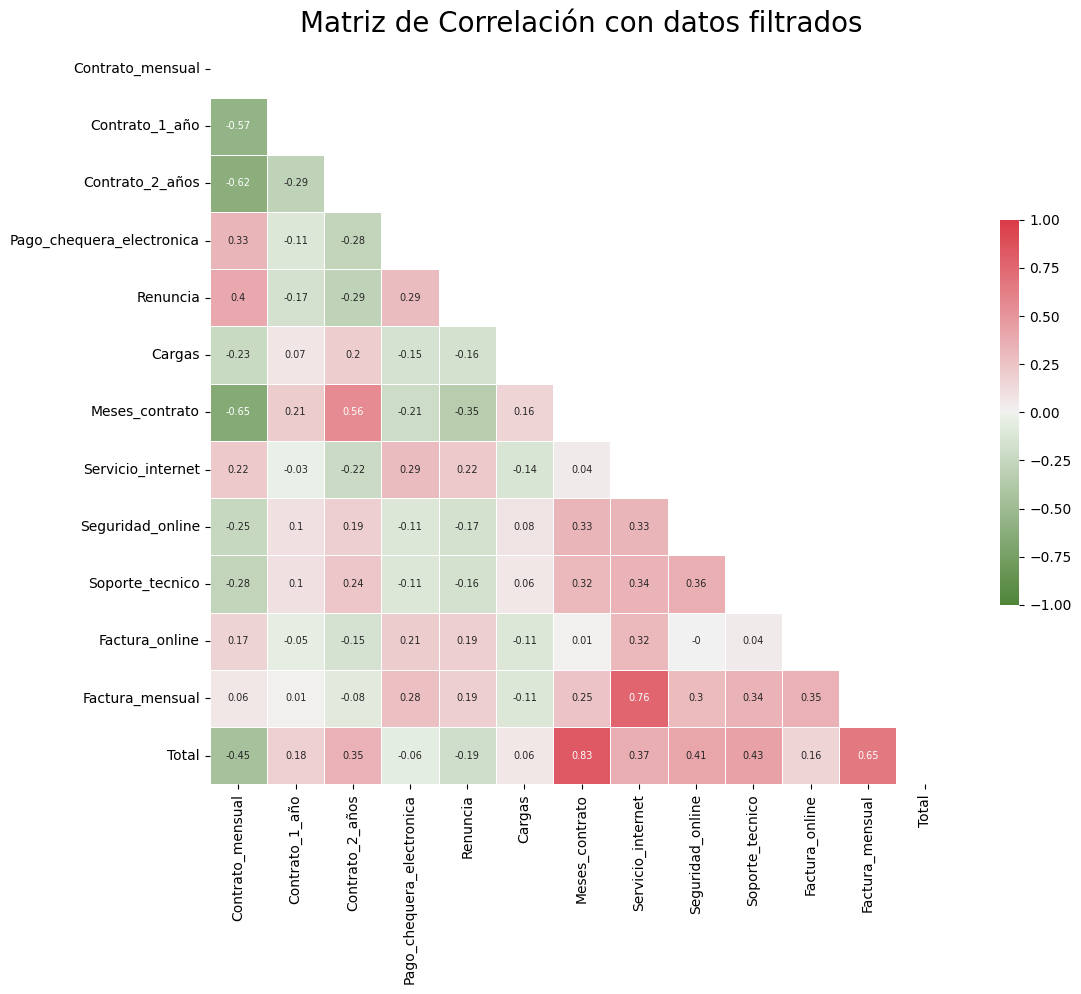

In [810]:
# Generar una máscara para el triángulo superior
mascara = np.zeros_like(datos_corr_filtrado, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(12,10))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(120, 10, as_cmap=True)

sns.heatmap(datos_corr_filtrado, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, annot_kws={'size': 7},cbar_kws={"shrink": .5})

# Ajustar tamaño de las etiquetas de los ejes
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Matriz de Correlación con datos filtrados', fontsize=20)

# Mostrar el mapa de calor (heatmap)
plt.show()


##Análisis VIF  (multicolinealidad)

Se realizará el análisis de factor de inflación de la varianza sobre los datos normalizados. Se agrega una constanta a la tabla de datos

*   Valores ok menores a 5
*   Valores aceptables entre 5 y 10
*   Valores descartables mayores a 10





In [811]:
X_norm=datos.drop('Renuncia',axis=1)
y_norm=datos['Renuncia']
X_const=add_constant(X_norm)
X_const

,const,Contrato_mensual,Contrato_1_año,Contrato_2_años,Pago_transferencia,Pago_tarjeta,Pago_chequera_electronica,Pago_cheque,Genero_Masculino,Adulto_Mayor,...,Servicio_internet,Seguridad_online,Respaldo_online,Proteccion_equipo,Soporte_tecnico,TVcable,Peliculas_online,Factura_online,Factura_mensual,Total
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,65.60,593.30
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.90,542.40
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,73.90,280.85
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,98.00,1237.85
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,55.15,742.90
7252,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,85.10,1873.70
7253,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,50.30,92.75
7254,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,67.85,4627.65


In [812]:
columnas=X_const.columns

VIF1=pd.DataFrame()
VIF1['Variables']=columnas
VIF1['VIF']=[variance_inflation_factor(X_const[columnas],i) for i in range(len(columnas))]
VIF1.sort_values(by='VIF',ascending=False)

,Variables,VIF
1,Contrato_mensual,inf
5,Pago_tarjeta,inf
2,Contrato_1_año,inf
3,Contrato_2_años,inf
4,Pago_transferencia,inf
7,Pago_cheque,inf
6,Pago_chequera_electronica,inf
23,Factura_mensual,14.077369
24,Total,10.832692
12,Meses_contrato,7.580382


In [813]:
columnas2=['Total'
,'Meses_contrato'
,'Servicio_internet'
,'Servicio_telefonico'
,'Peliculas_online'
,'TVcable'
,'Multilineas'
,'Proteccion_equipo'
,'Respaldo_online'
,'Soporte_tecnico'
,'Casado'
,'Seguridad_online'
,'Cargas'
,'Factura_online'
,'Adulto_Mayor'
,'Genero_Masculino'
,'const'
]
#Eliminadas
#Contrato_mensual	,Pago_tarjeta	,Contrato_1_año	,Contrato_2_años,Pago_transferencia	,Pago_cheque	,Pago_chequera_electronica
#Factura_mensual se sab¿ca por ser mayor a 10 y se deja el Total


In [814]:
VIF2=pd.DataFrame()
VIF2['Variables']=columnas2
VIF2['VIF']=[variance_inflation_factor(X_const[columnas2],i) for i in range(len(columnas2))]
VIF2.sort_values(by='VIF',ascending=False)

,Variables,VIF
16,const,30.998289
0,Total,8.831236
1,Meses_contrato,5.384646
2,Servicio_internet,2.236951
4,Peliculas_online,1.719597
5,TVcable,1.706441
7,Proteccion_equipo,1.522982
8,Respaldo_online,1.463981
10,Casado,1.453581
6,Multilineas,1.435816


In [815]:
datos_vif=pd.DataFrame()
for i in columnas2:
  if i in datos.columns:
    datos_vif[i]=datos[i]
datos_vif

,Total,Meses_contrato,Servicio_internet,Servicio_telefonico,Peliculas_online,TVcable,Multilineas,Proteccion_equipo,Respaldo_online,Soporte_tecnico,Casado,Seguridad_online,Cargas,Factura_online,Adulto_Mayor,Genero_Masculino
0,593.30,9.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
1,542.40,9.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,280.85,4.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1237.85,13.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
4,267.40,3.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,742.90,13.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
7252,1873.70,22.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
7253,92.75,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7254,4627.65,67.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0


##Resumen Preparación de Datos

Una vez hecho los diferentes análisis contamos con los datos modificados de la siguiente manera

- datos : datos iniciales

- X  : Dataframe con todas las columnas excepto la columna de Renuncia (% del total)
- y  : Serie con la columna Evasión (% del total)
- X_ent, y_ent : datos de entrenamiento inicial
- X_test, y_test : datos de prueba
- X_train, y_train: datos de entrenamiento parcial
- X_val, y_val :datos de validación

- datos_corr :datos con análisis de correlación y eliminación de columnas con baja correlación

- datos_vif : datos con el análisi de VIF aplicado y eliminación de columnas que presentan alta colinealidad


Ahora se trabajará con los distintos conjuntos de datos para ver como van cambiando nuestros modelos de predicción.

#🤖 Modelado Predictivo

## Separación de Datos (originales, correlación, vif)

Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.

Los datos fueron separados anteriormente en la etapara de balanceo

In [816]:
#Datos originales
X=datos.drop('Renuncia',axis=1)
y=datos['Renuncia']
X_ent,X_test,y_ent,y_test=train_test_split(X,y,test_size=0.2,random_state=5,stratify=y)
X_train,X_val,y_train,y_val=train_test_split(X_ent,y_ent,test_size=0.1,random_state=5,stratify=y_ent)

#Datos Correlacion
X_c=datos_corr.drop('Renuncia',axis=1)
y_c=datos_corr['Renuncia']
X_corr,X_test_corr,y_corr,y_test_corr=train_test_split(X_c,y_c,test_size=0.2,random_state=5,stratify=y_c)
X_train_corr,X_val_corr,y_train_corr,y_val_corr=train_test_split(X_corr,y_corr,test_size=0.1,random_state=5,stratify=y_corr)

##Datos VIF
X_v=datos_vif
y_v=datos['Renuncia']
X_vif,X_test_vif,y_vif,y_test_vif=train_test_split(X_v,y_v,test_size=0.2,random_state=5,stratify=y_v)
X_train_vif,X_val_vif,y_train_vif,y_val_vif=train_test_split(X_vif,y_vif,test_size=0.1,random_state=5,stratify=y_vif)



### Modelo Random Forest

In [817]:
modelo_random=RandomForestClassifier(max_depth = 10,random_state=5)
modelo_random_corr=RandomForestClassifier(max_depth = 10,random_state=5)
modelo_random_vif=RandomForestClassifier(max_depth = 10,random_state=5)


####Precisión del modelo con datos de entrenamiento TRAIN y de validacion VAL

In [818]:
modelo_random.fit(X_train,y_train)
print(f'Exactitud con datos Train originales: {modelo_random.score(X_train,y_train)*100:.2f}%')
print(f'Exactitud con datos Val originales: {modelo_random.score(X_val,y_val)*100:.2f}%')

modelo_random_corr.fit(X_train_corr,y_train_corr)

print(f'Exactitud con datos Train de correlacion: {modelo_random_corr.score(X_train_corr,y_train_corr)*100:.2f}%')
print(f'Exactitud con datos Val de correlacion: {modelo_random_corr.score(X_val_corr,y_val_corr)*100:.2f}%')

modelo_random_vif.fit(X_train_vif,y_train_vif)

print(f'Exactitud con datos Train de VIF: {modelo_random_vif.score(X_train_vif,y_train_vif)*100:.2f}%')
print(f'Exactitud con datos Val de VIF: {modelo_random_vif.score(X_val_vif,y_val_vif)*100:.2f}%')

Exactitud con datos Train originales: 87.59%
Exactitud con datos Val originales: 80.21%
Exactitud con datos Train de correlacion: 86.85%
Exactitud con datos Val de correlacion: 78.83%
Exactitud con datos Train de VIF: 87.34%
Exactitud con datos Val de VIF: 78.66%


### Evaluación del Modelo (Analizando otras métricas) y distintos set de datos

Evalúa cada modelo utilizando las siguientes métricas:

*   Matriz de confusión
*   Exactitud (Acurácy)
*   Precisión
*   Recall
*   F1-score


#### Modelos de Random forest

In [819]:
modelo_random.fit(X_train,y_train)
y_previsto_rf=modelo_random.predict(X_val)

modelo_random_corr.fit(X_train_corr,y_train_corr)
y_previsto_rf_corr=modelo_random_corr.predict(X_val_corr)

modelo_random_vif.fit(X_train_vif,y_train_vif)
y_previsto_rf_vif=modelo_random_vif.predict(X_val_vif)

###Matriz de confusión

In [820]:
matriz_confusion=confusion_matrix(y_val,y_previsto_rf)
matriz_confusion

array([[387,  44],
       [ 71,  79]])

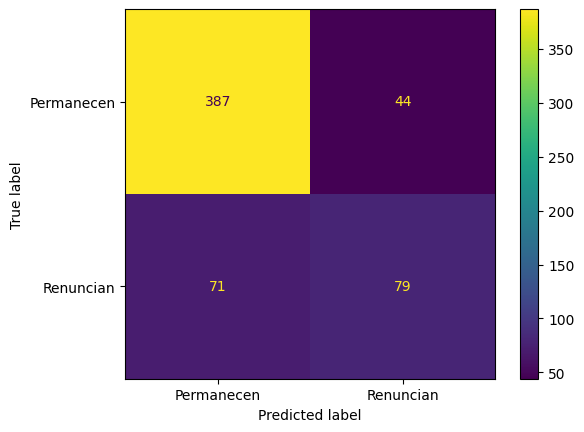

In [821]:
visualización=ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['Permanecen','Renuncian'])
visualización.plot()

###Informe de Métricas

####Calculo por variable

In [822]:
def calcular_metricas(y_test,y_pred):

  metricas = {'accuracy':accuracy_score(y_test,y_pred),
              'recall':recall_score(y_test,y_pred),
              'precision':precision_score(y_test,y_pred),
               'f1':f1_score(y_test,y_pred)
                }
  return metricas

In [823]:
#Modelo Random Forest
calcular_metricas(y_val,y_previsto_rf)

{'accuracy': 0.802065404475043,
 'recall': 0.5266666666666666,
 'precision': 0.6422764227642277,
 'f1': 0.5787545787545788}

####Calculo concentrado

In [824]:
#Modelo Random Forest
print('El informe de métricas para el modelo Random Forest es :')
print(classification_report(y_val,y_previsto_rf))

El informe de métricas para el modelo Random Forest es :
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87       431
         1.0       0.64      0.53      0.58       150

    accuracy                           0.80       581
   macro avg       0.74      0.71      0.72       581
weighted avg       0.79      0.80      0.80       581



### Resumen ----   Modelos sin balanceo de datos

In [825]:
resultados=pd.DataFrame(index=['accuracy','recall', 'precision', 'f1'])
modelos={'modelo_random':[y_previsto_rf,y_val], 'modelo_random_corr':[y_previsto_rf_corr,y_val_corr],'modelo_random_vif':[y_previsto_rf_vif,y_val_vif]       }

for m, v in modelos.items():
  #modelo_arbol.fit(X_train,y_train)
  #y_previsto_arbol=modelo_arbol.predict(X_val)
  metricas = calcular_metricas(v[1],v[0])
  resultados[m] = list(metricas.values())

resultados=resultados.T
resultados.sort_values(by='recall',ascending=False)



,accuracy,recall,precision,f1
modelo_random_corr,0.788296,0.533333,0.601504,0.565371
modelo_random,0.802065,0.526667,0.642276,0.578755
modelo_random_vif,0.786575,0.480000,0.610169,0.537313


####OBS:

De los datos obtenidos podemos observar que el "accuracy (exactitud)" es muy parecido para todso los set de datos y "recall" varia unos puntos:




###Modelos con balanceo de datos y validacion cruzada

In [826]:
from ctypes import c_char
df_resultados=pd.DataFrame(index=['accuracy','recall', 'precision', 'f1'])

#modelo_arbol.fit(X_ent, y_ent)
#y_previsto_arbol=modelo_arbol.predict(X_val)

modelos_over={'modelo_random_over':[modelo_random,X_ent, y_ent],
              'modelo_random_over_corr':[modelo_random_corr,X_corr, y_corr],
              'modelo_random_over_vif':[modelo_random_vif,X_vif, y_vif]
         }
modelos_under={'modelo_random_under':[modelo_random,X_ent, y_ent],
              'modelo_random_under_corr':[modelo_random_corr,X_corr, y_corr],
              'modelo_random_under_vif':[modelo_random_vif,X_vif, y_vif]
         }

def promedios(resultados):
  prom_accuracy=resultados['test_accuracy'].mean()
  prom_recall=resultados['test_recall'].mean()
  prom_precision=resultados['test_precision'].mean()
  prom_f1=resultados['test_f1'].mean()
  return {'accuracy':prom_accuracy,'recall':prom_recall,'precision':prom_precision,'f1':prom_f1}

for m, v in modelos_over.items():
  #print(v[0])
  pipeline=imbpipeline(steps=[('oversampling',SMOTE(random_state=5)),('Modelo',v[0])]) #Recibe datos en lissta y dentro de estoen tuplas
  skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
  cv_resultados_over = cross_validate(pipeline, v[1], v[2], cv=skf, scoring = ['accuracy','recall', 'precision', 'f1'])
#cv_resultados_over
  df_resultados[m] = list(promedios(cv_resultados_over).values())

for m, v in modelos_under.items():
  #print(v[0])
  pipeline=imbpipeline(steps=[('undersampling',NearMiss(version=3)),('Modelo',v[0])]) #Recibe datos en lissta y dentro de estoen tuplas
  skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
  cv_resultados_under = cross_validate(pipeline, v[1], v[2], cv=skf, scoring = ['accuracy','recall', 'precision', 'f1'])
  df_resultados[m]=list(promedios(cv_resultados_under).values())



df_resultados=df_resultados.T
df_resultados['prom acc-recall']=df_resultados[['accuracy','recall']].mean(axis=1)
df_resultados['prom total']=df_resultados.mean(axis=1)
df_resultados.sort_values(by='recall',ascending=False)


,accuracy,recall,precision,f1,prom acc-recall,prom total
modelo_random_under,0.754134,0.678930,0.517442,0.587156,0.716532,0.650839
modelo_random_under_corr,0.745691,0.663545,0.504987,0.573260,0.704618,0.638420
modelo_random_under_vif,0.735872,0.641472,0.490946,0.555818,0.688672,0.622556
modelo_random_over,0.786524,0.610033,0.582074,0.595661,0.698279,0.654514
modelo_random_over_corr,0.787043,0.607358,0.583411,0.594966,0.697200,0.653996
modelo_random_over_vif,0.780495,0.557860,0.576831,0.566922,0.669177,0.630257


#Modelo Final

Basado en los datos estadisticos, se opta por el "modelo_randon_under" porque aumenta el recall, es decir la que aumenta la capacidad de detectar aquellos clientes que van a renunciar y que el modelo habia predicho que no lo harían

##Balanceo de datos


In [827]:
#balanceo de carga
Undersampling=NearMiss(version=3)
X_balanceada,Y_balanceada=Undersampling.fit_resample(X_ent,y_ent)
X_balanceada_train,Y_balanceada_train=Undersampling.fit_resample(X_train,y_train)
X_balanceada_val,Y_balanceada_val=Undersampling.fit_resample(X_val,y_val)
X_balanceada_test,Y_balanceada_test=Undersampling.fit_resample(X_test,y_test)



## Modelo Random Forest y Matriz de confusion

El informe de métricas para el modelo Random Forest es :
              precision    recall  f1-score   support

         0.0       0.87      0.79      0.83      1078
         1.0       0.52      0.66      0.58       374

    accuracy                           0.75      1452
   macro avg       0.69      0.72      0.70      1452
weighted avg       0.78      0.75      0.76      1452



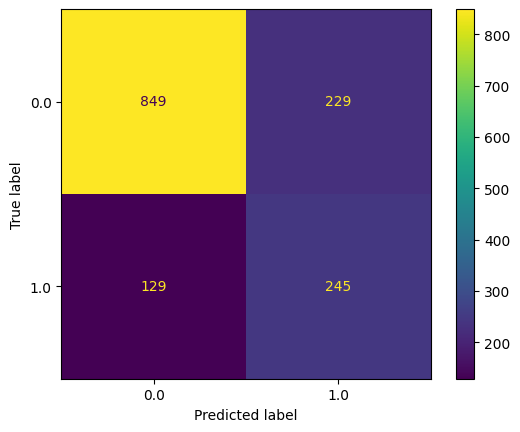

In [828]:

modelo=RandomForestClassifier(max_depth = 10,random_state=5)
modelo.fit(X_balanceada,Y_balanceada)
y_previsto_ch=modelo.predict(X_test)

#Modelo Random Forest
print('El informe de métricas para el modelo Random Forest es :')
print(classification_report(y_test,y_previsto_ch))
ConfusionMatrixDisplay.from_predictions(y_test,y_previsto_ch);

##Análisis de la Importancia de las Variables del Champion

In [829]:
X.columns

Index(['Contrato_mensual', 'Contrato_1_año', 'Contrato_2_años',
       'Pago_transferencia', 'Pago_tarjeta', 'Pago_chequera_electronica',
       'Pago_cheque', 'Genero_Masculino', 'Adulto_Mayor', 'Casado', 'Cargas',
       'Meses_contrato', 'Servicio_telefonico', 'Multilineas',
       'Servicio_internet', 'Seguridad_online', 'Respaldo_online',
       'Proteccion_equipo', 'Soporte_tecnico', 'TVcable', 'Peliculas_online',
       'Factura_online', 'Factura_mensual', 'Total'],
      dtype='object')

In [830]:
len(X.columns)

24

###Chequeo con el modelo

In [831]:
#Importancai de variables en modelo random forest elegido  (Solo valores de X)
importancia_ch=modelo.feature_importances_
importancia_ch

array([0.07775012, 0.02083443, 0.02556515, 0.01143682, 0.01127317,
       0.03676506, 0.01168644, 0.01921202, 0.01805148, 0.01770129,
       0.01871967, 0.21356214, 0.00991531, 0.01796996, 0.00322235,
       0.03144227, 0.02028933, 0.01562874, 0.03425807, 0.01538337,
       0.01756628, 0.02332595, 0.12222451, 0.20621609])

In [832]:
importancia_ch=pd.DataFrame({'Variables explicativas':X.columns,'Importancia':(importancia_ch*100).round(2)}).sort_values(by='Importancia',ascending=False)
importancia_ch

,Variables explicativas,Importancia
11,Meses_contrato,21.36
23,Total,20.62
22,Factura_mensual,12.22
0,Contrato_mensual,7.78
5,Pago_chequera_electronica,3.68
18,Soporte_tecnico,3.43
15,Seguridad_online,3.14
2,Contrato_2_años,2.56
21,Factura_online,2.33
1,Contrato_1_año,2.08


In [833]:
len(importancia_ch)

24

###Cantidad de features necesarios

In [834]:
#Creo DF con solo sus indices
resultados_ch=pd.DataFrame(index=['accuracy','recall', 'precision', 'f1'])
#Modelo a utilizar
modelo_champion_var=RandomForestClassifier(max_depth = 10,random_state=5)
ct_features=[i if i!=0 else 1 for i in range(0,25,5)]

#Recorro cada columna en saltos de 5
#Toma 5 columnas y hace todo el análisis con el modelo y entrega los valores de RMSE, MAE y R2. Luego agrega 5 columnas mas y repite el análisis
for i in ct_features:
  selected_features = importancia_ch['Variables explicativas'].values[:i]
  X_train_sel = X_balanceada_train[selected_features]
  X_test_sel = X_balanceada_test[selected_features]
  modelo_champion_var.fit(X_train_sel, Y_balanceada_train)
  y_pred = modelo_champion_var.predict(X_test_sel)
  metricas = calcular_metricas(Y_balanceada_test,y_pred)
  resultados_ch[i] = list(metricas.values())

resultados_ch

,1,5,10,15,20
accuracy,0.683155,0.711230,0.712567,0.732620,0.733957
recall,0.510695,0.636364,0.644385,0.676471,0.676471
precision,0.779592,0.748428,0.746130,0.762048,0.764350
f1,0.617124,0.687861,0.691535,0.716714,0.717730


In [835]:
#Creo DF con solo sus indices
resultados_ch=pd.DataFrame(index=['accuracy','recall', 'precision', 'f1'])
#Modelo a utilizar
modelo_champion_var=RandomForestClassifier(max_depth = 10,random_state=5)
ct_features=[i if i!=0 else 1 for i in range(10,16)]

#Recorro cada columna en saltos de 5
#Toma 5 columnas y hace todo el análisis con el modelo y entrega los valores de RMSE, MAE y R2. Luego agrega 5 columnas mas y repite el análisis
for i in ct_features:
  selected_features = importancia_ch['Variables explicativas'].values[:i]
  X_train_sel = X_balanceada_train[selected_features]
  X_test_sel = X_balanceada_test[selected_features]
  modelo_champion_var.fit(X_train_sel, Y_balanceada_train)
  y_pred = modelo_champion_var.predict(X_test_sel)
  metricas = calcular_metricas(Y_balanceada_test,y_pred)
  resultados_ch[i] = list(metricas.values())

resultados_ch

,10,11,12,13,14,15
accuracy,0.712567,0.715241,0.715241,0.724599,0.731283,0.732620
recall,0.644385,0.657754,0.660428,0.660428,0.665775,0.676471
precision,0.746130,0.743202,0.741742,0.757669,0.766154,0.762048
f1,0.691535,0.697872,0.698727,0.705714,0.712446,0.716714


###Selección de variables

Considerando solo el análisis del recall y el accuracy, se dejan 14 variables como parte del modelo.


In [836]:
#Df final quedaría con las siguientes columnas
selected_features = importancia_ch['Variables explicativas'].values[:12]
X_selected_features=X[selected_features]
X_selected_features.head()

,Meses_contrato,Total,Factura_mensual,Contrato_mensual,Pago_chequera_electronica,Soporte_tecnico,Seguridad_online,Contrato_2_años,Factura_online,Contrato_1_año,Respaldo_online,Genero_Masculino
0,9.0,593.30,65.6,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
1,9.0,542.40,59.9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,4.0,280.85,73.9,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,13.0,1237.85,98.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
4,3.0,267.40,83.9,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [837]:
X_selected_features.columns

Index(['Meses_contrato', 'Total', 'Factura_mensual', 'Contrato_mensual',
       'Pago_chequera_electronica', 'Soporte_tecnico', 'Seguridad_online',
       'Contrato_2_años', 'Factura_online', 'Contrato_1_año',
       'Respaldo_online', 'Genero_Masculino'],
      dtype='object')

##Tablas de datos finales

In [838]:
#Datos sin la columna Y
datos_modelo=X_selected_features.copy()
datos_modelo.head(2)

,Meses_contrato,Total,Factura_mensual,Contrato_mensual,Pago_chequera_electronica,Soporte_tecnico,Seguridad_online,Contrato_2_años,Factura_online,Contrato_1_año,Respaldo_online,Genero_Masculino
0,9.0,593.3,65.6,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
1,9.0,542.4,59.9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [842]:
#Datos con eje Y. Tabla completa
datos_tabla=X_selected_features.copy()
datos_tabla['Renuncia']=y
datos_correlacion=datos_tabla.copy()
datos_tabla['ID']=df_ID
datos_tabla.head(2)



,Meses_contrato,Total,Factura_mensual,Contrato_mensual,Pago_chequera_electronica,Soporte_tecnico,Seguridad_online,Contrato_2_años,Factura_online,Contrato_1_año,Respaldo_online,Genero_Masculino,Renuncia,ID
0,9.0,593.3,65.6,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0002-ORFBO
1,9.0,542.4,59.9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0003-MKNFE


###Guardando tabla en CSV

In [843]:
Tabla_final=datos_tabla.to_csv('Tabla_final.csv',index=False)

###Analisis de correlacion

In [844]:
#Correlación con la Evasión
correlacion_datos_tabla=datos_correlacion.corr()['Renuncia'].sort_values(ascending=False)
correlacion_datos_tabla

,Renuncia
Renuncia,1.000000
Contrato_mensual,0.395067
Pago_chequera_electronica,0.294181
Factura_mensual,0.189393
Factura_online,0.186309
Genero_Masculino,-0.009494
Respaldo_online,-0.080211
Soporte_tecnico,-0.160476
Seguridad_online,-0.166865
Contrato_1_año,-0.174340


###Elimina columnas

In [845]:
datos_modelo=datos_modelo.drop(['Genero_Masculino','Respaldo_online'],axis=1)
datos_modelo.head(2)

,Meses_contrato,Total,Factura_mensual,Contrato_mensual,Pago_chequera_electronica,Soporte_tecnico,Seguridad_online,Contrato_2_años,Factura_online,Contrato_1_año
0,9.0,593.3,65.6,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,9.0,542.4,59.9,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [846]:
datos_modelo.columns


Index(['Meses_contrato', 'Total', 'Factura_mensual', 'Contrato_mensual',
       'Pago_chequera_electronica', 'Soporte_tecnico', 'Seguridad_online',
       'Contrato_2_años', 'Factura_online', 'Contrato_1_año'],
      dtype='object')

##Separacion de datos finales

In [847]:
#Datos originales
X_ch=datos_modelo
y_ch=datos_tabla['Renuncia']
X_ent_ch,X_test_ch,y_ent_ch,y_test_ch=train_test_split(X_ch,y_ch,test_size=0.2,random_state=5,stratify=y)

##Guardando el modelo para reutilizar

###Modelo con columnas finales (10)

In [848]:
#balanceo de carga
#Undersampling=NearMiss(version=3)
#X_balanceada,Y_balanceada=Undersampling.fit_resample(X_ent,y_ent)


modelo_champion=RandomForestClassifier(max_depth = 10,random_state=5)
modelo_champion.fit(X_ch,y_ch)
y_previsto_ch=modelo_champion.predict(X_test_ch)
#print(f'Exactitud del modelo es: {modelo_champion.score(X_ch,y_ch)*100:.2f}%')

In [849]:
X_ch

,Meses_contrato,Total,Factura_mensual,Contrato_mensual,Pago_chequera_electronica,Soporte_tecnico,Seguridad_online,Contrato_2_años,Factura_online,Contrato_1_año
0,9.0,593.30,65.60,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,9.0,542.40,59.90,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,280.85,73.90,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,13.0,1237.85,98.00,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,3.0,267.40,83.90,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7251,13.0,742.90,55.15,0.0,0.0,1.0,1.0,0.0,0.0,1.0
7252,22.0,1873.70,85.10,1.0,1.0,0.0,0.0,0.0,1.0,0.0
7253,2.0,92.75,50.30,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7254,67.0,4627.65,67.85,0.0,0.0,1.0,1.0,1.0,0.0,0.0


###Guarda Modelo

In [850]:
import pickle

try:
  with open('modelo_champion.pkl','wb') as file:
    pickle.dump(modelo_champion,file)
  print('Modelo serializado con éxito')
except Exception as e:
  print('Se presentó un error al almacenar el modelo: ',str(e))


Modelo serializado con éxito


###Llama Modelo

In [851]:
import pickle

archivo = '/content/modelo_champion.pkl'


try:
    with open(archivo, 'rb') as file:
        model = pickle.load(file)
    print("¡Modelo cargado con éxito!")
except Exception as e:
    print("Ocurrió un error al cargar el modelo:", str(e))

¡Modelo cargado con éxito!


In [852]:
nuevo_dato = {
'Meses_contrato':[3]
,'Total':[267.40]
,'Factura_mensual':[83.90]
,'Contrato_mensual':[1]
,'Pago_chequera_electronica':[0]
,'Soporte_tecnico':[1]
,'Seguridad_online':[0]
,'Contrato_2_años':[0]
,'Factura_online':[1]
,'Contrato_1_año':[0]
}



###Datos de prueba

In [853]:
df_nuevo_dato=pd.DataFrame(nuevo_dato)
df_nuevo_dato

,Meses_contrato,Total,Factura_mensual,Contrato_mensual,Pago_chequera_electronica,Soporte_tecnico,Seguridad_online,Contrato_2_años,Factura_online,Contrato_1_año
0,3,267.4,83.9,1,0,1,0,0,1,0


##Prediccion

In [862]:
# Ejemplo de predicción con datos de entrada 'X'
int(model.predict(df_nuevo_dato)[0])


1

##Exactitud de modelo

In [ ]:
print(f'Exactitud del modelo es: {modelo_champion.score(X_ch,y_ch)*100:.2f}%')